In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

#### This notebook shows different methods to determine static constants required to model steady state separation point location.

Methods: directly from Xfoil (CF plots), indirectly from Xfoil (CN characteristic), indirectly from experiments (CN characteristic)

Aerofoils: SD7003, NACA0012, NACA0015

Models: Sheng et al., Original

Re: 300k - 6M

#### Table of results

|SD7003 aerofoil|
|:--:|


| No | Source  |Re number|Model | $\alpha_1$ in deg| $S_1$ in deg | $S_2$ in deg | 
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|
| 1  | Xfoil CF  | 1M|Sheng et al. | 15.05  | 1.71 |1.92 |
| 2  | Xfoil CF  | 1M|Original | 14.35|1.10 |2.32 |
| 3  | Xfoil CN  | 1M|Sheng et al. | 15.0 | 3.10|3.37 |
| 4  | Xfoil CN  | 1M|Original | 14.1  |3.07 |3.70 |
| 5  | Exp. [1] |300k|Sheng | 10.6*  | N/A|N/A |
| 6  | Exp. [1] | 300k|Original | 11.0* | N/A|N/A |

*$\alpha_1$ is approximated as stall angle from experimental data available in [1].

|NACA 0012 aerofoil|
|:--:|


| No | Source  |Re number|Model | $\alpha_1$ in deg| $S_1$ in deg | $S_2$ in deg | 
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|
| 1  | Xfoil CF  | 1M|Sheng et al. | 16.2   | 1.52|3.21 |
| 2  | Xfoil CF  | 1M|Original |15.8 |1.52 |2.87 |
| 3  | Xfoil CN  | 1M|Sheng et al. | 14.5 | 4.07|4.84 |
| 4  | Xfoil CN  | 1M|Original | 13.1  |3.66 |5.68 |
| 5  | Exp. [2]  | 6M|Sheng | 17.13  | 3.62|1.20 |
| 6  | Exp. [2] | 6M|Original | 17.13 | 4.86|0.89 |
| 7  | Exp. [3]  |2.5M |Sheng | 15.0  | 5.05| 1.34 |
| 8  | Exp. [3] |2.5M |Original | 15.0 | 7.56|1.12 |
|9| Dymore's Manual (Mach 0.3)|N/A|Original|15.25|3.0|2.3|

|NACA 0015 aerofoil|
|:--:|

| No | Source  |Re number|Model | $\alpha_1$ in deg| $S_1$ in deg | $S_2$ in deg | 
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|
| 1  | Xfoil CF  | 1M|Sheng et al. |  17.0 |2.12 |4.00 |
| 2  | Xfoil CF  | 1M|Original | 16.5|2.17 |3.54 |
| 3  | Xfoil CN  | 1M|Sheng et al. | 15.3 | 3.52|5.65 |
| 4  | Xfoil CN  | 1M|Original | 13.5  |2.45 |7.13 |



[1] Selig, M.S., Lyon, C.A., Giguère, P., Ninham, C.N., and Guglielmo, J.J., Summary of Low-Speed Airfoil Data, Vol. 2, SoarTech Publications, Virginia Beach, VA, 1996, 252 pages. Wind tunnel data on 25 airfoils tested at Reynolds Numbers ranging from 40,000 to 400,000. Available at: http://m-selig.ae.illinois.edu/uiuc_lsat/Low-Speed-Airfoil-Data-V2.pdf

[2] https://turbmodels.larc.nasa.gov/NACA0012_validation/CLCD_Ladson_expdata.dat, 05.07.2017

[3] McAlister, Kenneth W., Lawrence W. Carr, and William J. McCroskey. "Dynamic stall experiments on the NACA 0012 airfoil." (1978). https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19780009057.pdf



# SD7003

In [52]:
#CASES 1 & 2

#Read CF(alpha) data from file
data = readdlm("xfoil_sd7003_CF.txt",skipstart=1)
alpha_CF = data[:,1]
f = data[:,2]

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_1, s1_1, s2_1, f_1 = findStaticCoeff(alpha_CF, f, "Sheng") 
a1_2, s1_2, s2_2, f_2 = findStaticCoeff(alpha_CF, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[1 "Xfoil CF" "Sheng" a1_1 s1_1 s2_1],[2 "Xfoil CF"  "Original"  a1_2 s1_2 s2_2])

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 1        "Xfoil CF"  "Sheng"     15.05   1.7142   1.92591
 2        "Xfoil CF"  "Original"  14.35   1.09587  2.31601

In [47]:
#CASES 3 & 4
#Read CN(alpha) data from file prepared in xfoil
xfoil = Xfoil("xfoil_sd7003_CN.txt")

#Calculate f basing on CN(alpha)
f = fFromCN(xfoil.alpha, xfoil.CN)

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_3, s1_3, s2_3, f_3 = findStaticCoeff(xfoil.alpha, f, "Sheng") 
a1_4, s1_4, s2_4, f_4 = findStaticCoeff(xfoil.alpha, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[3 "Xfoil CN" "Sheng" a1_3 s1_3 s2_3],[4 "Xfoil CN"  "Original" a1_4 s1_4 s2_4])

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 3        "Xfoil CN"  "Sheng"     15.0    3.10106  3.37376
 4        "Xfoil CN"  "Original"  14.1    3.06665  3.70008

In [64]:
#CASES 5 & 6
#NO EXPERIMENTAL DATA AVAILABLE

#Read CN(alpha) data from file
#data = readdlm("exp_sd7003_CN.txt",skipstart=1)
#alpha_CN = data[:,1]
#CN = data[:,2]

#Calculate f basing on CN(alpha)
#f = fFromCN(alpha_CN, CN)

#Obtain static coefficients
#Two models are available, Sheng and Original
#a1_5, s1_5, s2_5, f_5 = findStaticCoeff(alpha_CN, f, "Sheng") 
#a1_6, s1_6, s2_6, f_6 = findStaticCoeff(alpha_CN, f, "Original");

#vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[5 "exp CN" "Sheng" a1_5 s1_5 s2_5],[6 "exp CN"  "Original" a1_6 s1_6 s2_6])

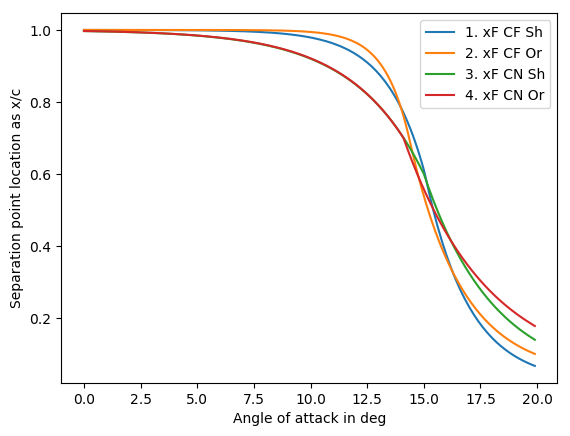

PyObject <matplotlib.text.Text object at 0x00000000272E4BA8>

In [63]:
plot(xfoil.alpha,fFromConst(xfoil.alpha, a1_1,s1_1,s2_1, "Sheng"),label="1. xF CF Sh")
plot(xfoil.alpha, fFromConst(xfoil.alpha, a1_2,s1_2,s2_2, "Original"), label ="2. xF CF Or")
plot(xfoil.alpha, f_3, label = "3. xF CN Sh")
plot(xfoil.alpha, f_4, label = "4. xF CN Or")
#plot(alpha_CN, f_5, label = "5. exp CN Sh")
#plot(alpha_CN, f_6, label = "6. exp CN Or")
legend()
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

### Notice the difference in stall angle predicted by Xfoil and observed in experiment. 
$\alpha_1$ from experiments is ~10.5 deg, while Xfoil predicts $\alpha_1$ at ~14 deg. It is possible to change value of N (free transition criterion) in Xfoil from default 9 to 13, to provide better agreement with experimental results.
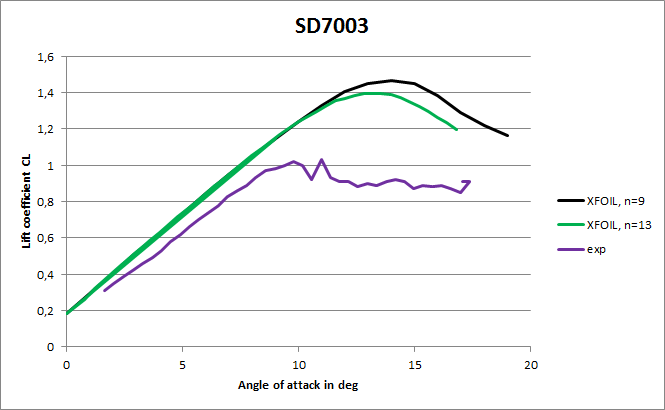
For this reason it is worth checking how the model would behave if the value of $\alpha_1$ was modified to fit to the experimental data. Values of S1 and S2 cannot be determined basing on experiment, as only CL(alpha) experimental data is available. 
### This issue has been described in:
Selig, M.S., Lyon, C.A., Giguère, P., Ninham, C.N., and Guglielmo, J.J., Summary of Low-Speed Airfoil Data, Vol. 2, SoarTech Publications, Virginia Beach, VA, 1996, 252 pages. Wind tunnel data on 25 airfoils tested at Reynolds Numbers ranging from 40,000 to 400,000. Available at: http://m-selig.ae.illinois.edu/uiuc_lsat/Low-Speed-Airfoil-Data-V2.pdf

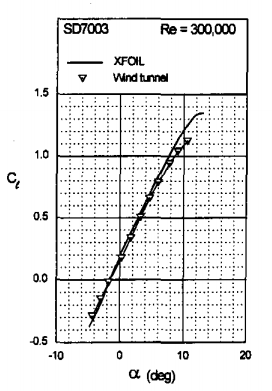

# NACA0012

In [165]:
#CASES 1 & 2

#Read CF(alpha) data from file
data = readdlm("xfoil_0012_CF.txt",skipstart=1)
alpha_CF = data[:,1]
f = data[:,2]

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_1, s1_1, s2_1, f_1 = findStaticCoeff(alpha_CF, f, "Sheng") 
a1_2, s1_2, s2_2, f_2 = findStaticCoeff(alpha_CF, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[1 "Xfoil CF" "Sheng" a1_1 s1_1 s2_1],[2 "Xfoil CF"  "Original"  a1_2 s1_2 s2_2])

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 1        "Xfoil CF"  "Sheng"     16.2    1.51911  3.2143 
 2        "Xfoil CF"  "Original"  15.8    1.52058  2.87338

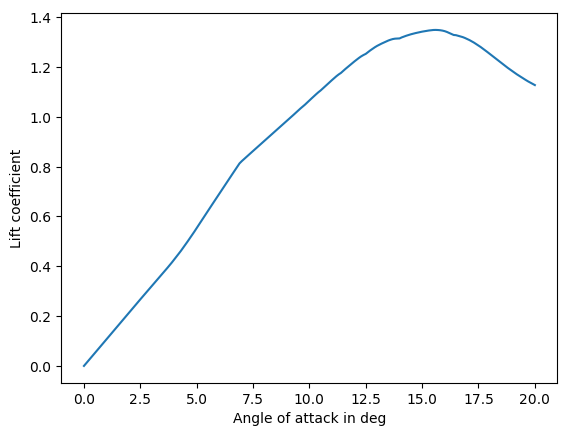

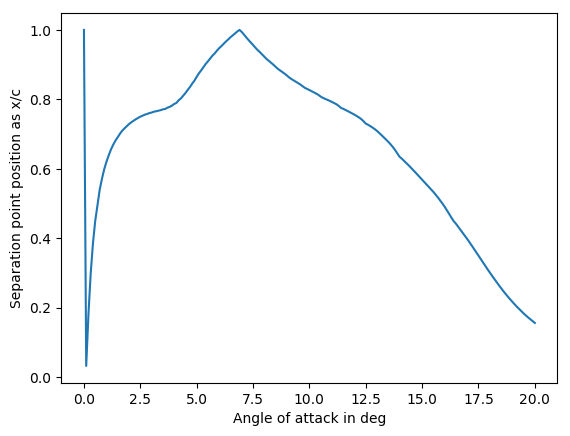

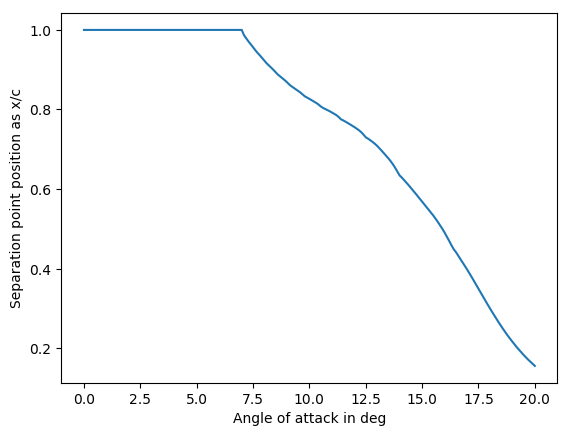

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 3        "Xfoil CN"  "Sheng"     14.5    4.07144  4.83818
 4        "Xfoil CN"  "Original"  13.1    3.66493  5.68072

In [121]:
#CASES 3 & 4
#Read CN(alpha) data from file prepared in xfoil
xfoil = Xfoil("xfoil_0012_CN.txt")
xfoil.CN[1]=0 #necessary fix, or else sqrt(<0)

plot(xfoil.alpha, xfoil.CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#Calculate f basing on CN(alpha)
#lin parameter should be set as max. alpha for which CN is linear
f = fFromCN(xfoil.alpha, xfoil.CN, lin=12.)

figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#f characteristic needs to be modified so that for low angles of attack fsep is not smaller than 0.9

f[1:69]=1.0
figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_3, s1_3, s2_3, f_3 = findStaticCoeff(xfoil.alpha, f, "Sheng") 
a1_4, s1_4, s2_4, f_4 = findStaticCoeff(xfoil.alpha, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[3 "Xfoil CN" "Sheng" a1_3 s1_3 s2_3],[4 "Xfoil CN"  "Original" a1_4 s1_4 s2_4])

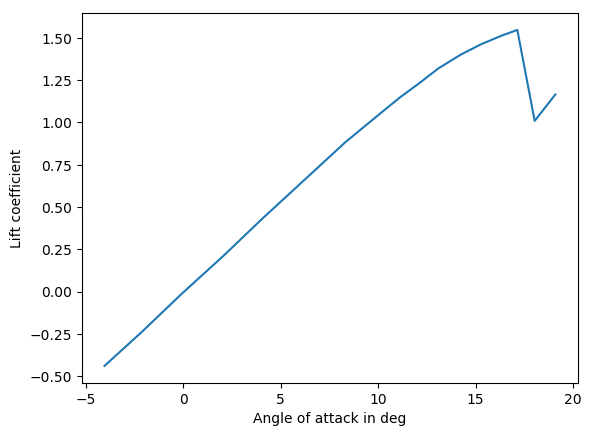

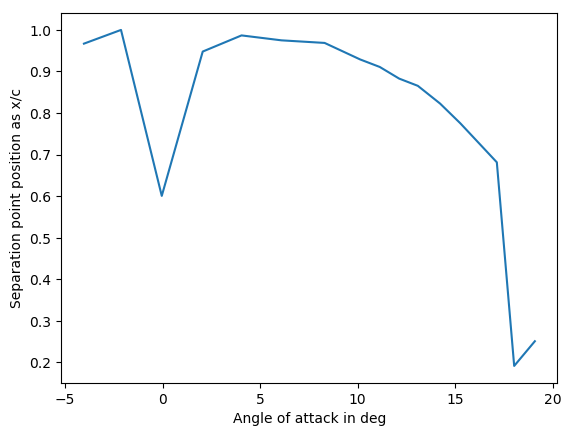

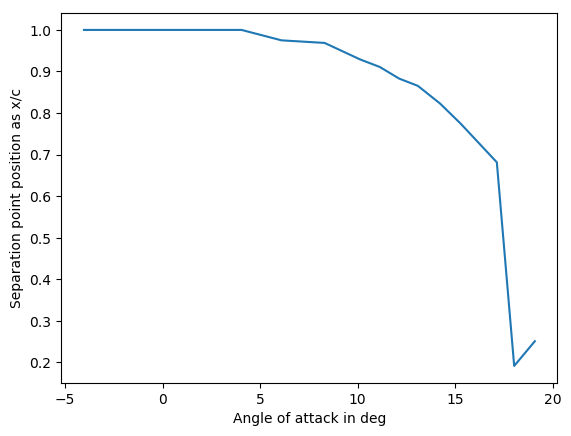

3×6 Array{Any,2}:
  "Case"  "Method"  "Model"       "a1"   "s1"     "s2"   
 5        "exp CN"  "Sheng"     17.13   3.61623  1.20421 
 6        "exp CN"  "Original"  17.13   4.86223  0.890141

In [146]:
#CASES 5 & 6

#Read CL(alpha) and CD(alpha) data from file
data = readdlm("exp_0012_CL.txt",skipstart=1)
alpha_CN = data[:,1]
CL = data[:,2]
CD = data[:,3]

CN = zeros(length(alpha_CN))

for idx = 1 : length(alpha_CN)
    CN[idx] = CL[idx]*cos(deg2rad(alpha_CN[idx]))+CD[idx]*sin(deg2rad(alpha_CN[idx]))
end

plot(alpha_CN, CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#lin parameter should be set as max. alpha for which CN is linear
#Calculate f basing on CN(alpha)
f = fFromCN(alpha_CN, CN, lin=7.)

figure()
plot(alpha_CN, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#f characteristic needs to be modified so that for low angles of attack fsep is not smaller than 0.9
f[1:5]=1.0

figure()
plot(alpha_CN, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")



#Obtain static coefficients
#Two models are available, Sheng and Original
a1_5, s1_5, s2_5, f_5 = findStaticCoeff(alpha_CN, f, "Sheng") 
a1_6, s1_6, s2_6, f_6 = findStaticCoeff(alpha_CN, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[5 "exp CN" "Sheng" a1_5 s1_5 s2_5],[6 "exp CN"  "Original" a1_6 s1_6 s2_6])

In [151]:
#CASES 5 & 6

#Read CN(alpha) data from file
data = readdlm("exp_0012_CN.txt",skipstart=1)
alpha_CN_2 = data[:,1]
CN = data[:,2]

#Calculate f basing on CN(alpha)
f = fFromCN(alpha_CN_2, CN)

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_7, s1_7, s2_7, f_7 = findStaticCoeff(alpha_CN_2, f, "Sheng") 
a1_8, s1_8, s2_8, f_8 = findStaticCoeff(alpha_CN_2, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[7 "exp CN" "Sheng" a1_7 s1_7 s2_7],[8 "exp CN"  "Original" a1_8 s1_8 s2_8])

3×6 Array{Any,2}:
  "Case"  "Method"  "Model"       "a1"   "s1"     "s2"  
 7        "exp CN"  "Sheng"     15.0    5.04579  1.33901
 8        "exp CN"  "Original"  15.0    7.56465  1.1176 

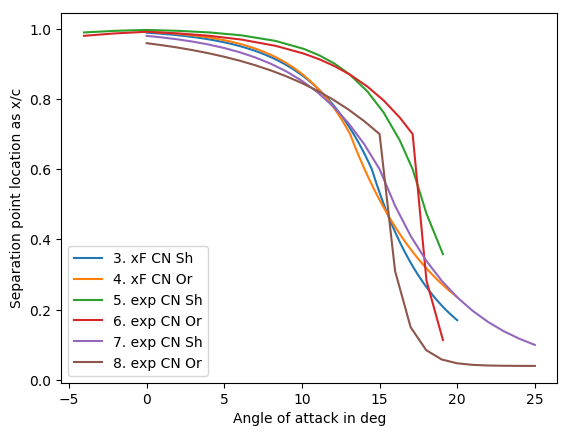

PyObject <matplotlib.text.Text object at 0x0000000029E0AA90>

In [150]:
#plot(xfoil.alpha,fFromConst(xfoil.alpha, a1_1,s1_1,s2_1, "Sheng"),label="1. xF CF Sh")
#plot(xfoil.alpha, fFromConst(xfoil.alpha, a1_2,s1_2,s2_2, "Original"), label ="2. xF CF Or")
plot(xfoil.alpha, f_3, label = "3. xF CN Sh")
plot(xfoil.alpha, f_4, label = "4. xF CN Or")
plot(alpha_CN, f_5, label = "5. exp CN Sh")
plot(alpha_CN, f_6, label = "6. exp CN Or")
plot(alpha_CN_2, f_7, label = "7. exp CN Sh")
plot(alpha_CN_2, f_8, label = "8. exp CN Or")
legend()
xlabel("Angle of attack in deg")
ylabel("Separation point location as x/c")

# NACA0015

In [168]:
#CASES 1 & 2

#Read CF(alpha) data from file
data = readdlm("xfoil_0015_CF.txt",skipstart=1)
alpha_CF = data[:,1]
f = data[:,2]

#Obtain static coefficients
#Two models are available, Sheng and Original
a1_1, s1_1, s2_1, f_1 = findStaticCoeff(alpha_CF, f, "Sheng") 
a1_2, s1_2, s2_2, f_2 = findStaticCoeff(alpha_CF, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[1 "Xfoil CF" "Sheng" a1_1 s1_1 s2_1],[2 "Xfoil CF"  "Original"  a1_2 s1_2 s2_2])

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 1        "Xfoil CF"  "Sheng"     17.0    2.11564  4.00396
 2        "Xfoil CF"  "Original"  16.5    2.17299  3.53881

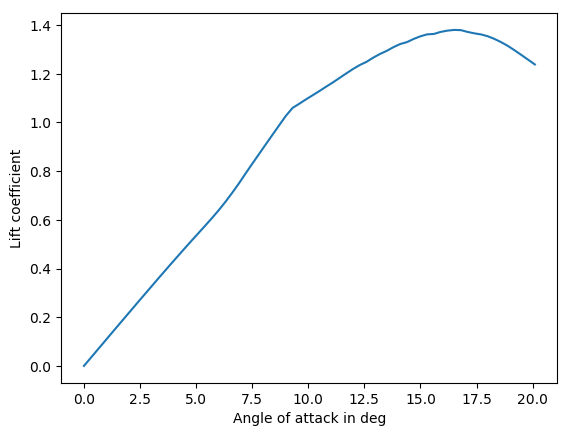

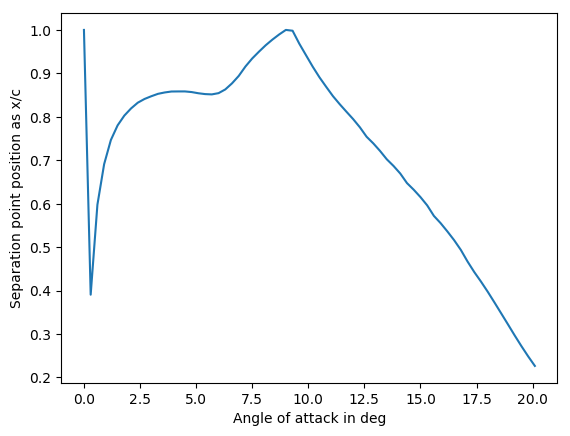

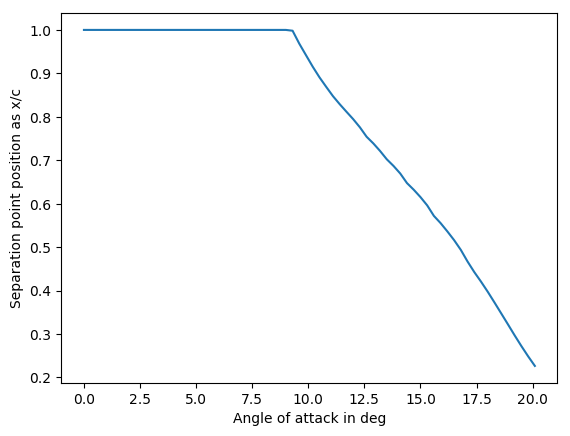

3×6 Array{Any,2}:
  "Case"  "Method"    "Model"       "a1"   "s1"     "s2"  
 3        "Xfoil CN"  "Sheng"     15.3    3.51882  5.65377
 4        "Xfoil CN"  "Original"  13.5    2.45366  7.12977

In [162]:
#CASES 3 & 4
#Read CN(alpha) data from file prepared in xfoil
xfoil = Xfoil("xfoil_0015_CN.txt")
xfoil.CN[1]=0 #necessary fix, or else sqrt(<0)

plot(xfoil.alpha, xfoil.CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#Calculate f basing on CN(alpha)
#lin parameter should be set as max. alpha for which CN is linear
f = fFromCN(xfoil.alpha, xfoil.CN, lin=12.5)

figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#f characteristic needs to be modified so that for low angles of attack fsep is not smaller than 0.9


f[1:30]=1.0
figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")


#Obtain static coefficients
#Two models are available, Sheng and Original
a1_3, s1_3, s2_3, f_3 = findStaticCoeff(xfoil.alpha, f, "Sheng") 
a1_4, s1_4, s2_4, f_4 = findStaticCoeff(xfoil.alpha, f, "Original");

vcat(["Case" "Method" "Model" "a1" "s1" "s2"],[3 "Xfoil CN" "Sheng" a1_3 s1_3 s2_3],[4 "Xfoil CN"  "Original" a1_4 s1_4 s2_4])